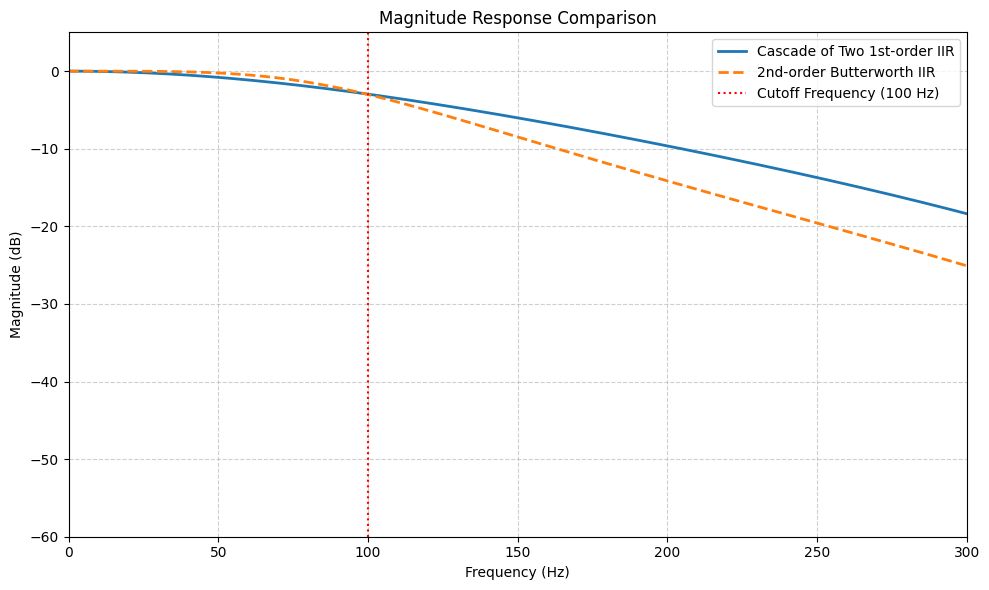

Poles of cascaded 1st-order filters: [0.32491969 0.3249197 ]
Poles of 2nd-order Butterworth filter: [0.57149025+0.2935992j 0.57149025-0.2935992j]


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# 参数设置
fs = 1000          # 采样频率 (Hz)
fc = 100           # 截止频率 (Hz)
nyq = fs / 2
fc_norm = fc / nyq  # 归一化截止频率 (0 ~ 1)

# ----------------------------
# 1. 设计两个一阶Butterworth低通滤波器并级联
# ----------------------------
# 一阶Butterworth（低通）
b1, a1 = signal.butter(N=1, Wn=1*fc_norm, btype='low', analog=False)
b1, a1 = signal.butter(N=1, Wn=1.5*fc_norm, btype='low', analog=False)

# 级联两个相同的一阶滤波器：等效于卷积分子和分母
b_cascade = np.convolve(b1, b1)
a_cascade = np.convolve(a1, a1)

# ----------------------------
# 2. 设计一个标准二阶Butterworth低通滤波器
# ----------------------------
b2, a2 = signal.butter(N=2, Wn=fc_norm, btype='low', analog=False)

# ----------------------------
# 3. 计算频率响应
# ----------------------------
f, h_cascade = signal.freqz(b_cascade, a_cascade, fs=fs, worN=2048)
_, h_butter2  = signal.freqz(b2, a2, fs=fs, worN=2048)

# 转换为幅度（dB）
mag_cascade = 20 * np.log10(abs(h_cascade))
mag_butter2 = 20 * np.log10(abs(h_butter2))

# ----------------------------
# 4. 绘图
# ----------------------------
plt.figure(figsize=(10, 6))
plt.plot(f, mag_cascade, label='Cascade of Two 1st-order IIR', linewidth=2)
plt.plot(f, mag_butter2, '--', label='2nd-order Butterworth IIR', linewidth=2)
plt.axvline(fc, color='red', linestyle=':', label='Cutoff Frequency (100 Hz)')
plt.title('Magnitude Response Comparison')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(True, which='both', ls='--', alpha=0.6)
plt.xlim(0, 300)
plt.ylim(-60, 5)
plt.legend()
plt.tight_layout()
plt.show()

# ----------------------------
# 5. 打印极点位置（用于分析）
# ----------------------------
p_cascade = np.roots(a_cascade)
p_butter2 = np.roots(a2)

print("Poles of cascaded 1st-order filters:", p_cascade)
print("Poles of 2nd-order Butterworth filter:", p_butter4 if 'p_butter4' in locals() else p_butter2)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def decompose_biquad_to_cascade(b, a):
    """
    将二阶 IIR (biquad) 拆解为两个一阶 IIR 的级联（仅当极点/零点为实数时有效）
    
    参数:
        b: 分子系数 [b0, b1, b2]
        a: 分母系数 [1, a1, a2]
        
    返回:
        (b1_list, a1_list): 两个一阶系统的 (b, a) 系数列表
    """
    # 求零点和极点
    zeros = np.roots(b)
    poles = np.roots(a)
    
    # 检查是否都是实数
    if not (np.all(np.isreal(zeros)) and np.all(np.isreal(poles))):
        raise ValueError("系统包含复数零点或极点，无法用实系数一阶系统精确分解。")
    
    zeros = np.real(zeros)
    poles = np.real(poles)
    
    # 处理增益：H(z) = k * (z - z1)(z - z2) / ((z - p1)(z - p2))
    # 转换为 z^{-1} 形式： (1 - z1 z^{-1})(1 - z2 z^{-1}) / ((1 - p1 z^{-1})(1 - p2 z^{-1}))
    # 增益 k = b0 （因为 a[0] = 1）
    k = b[0]  # 假设 a[0] = 1
    
    # 构造两个一阶系统
    # 第一个: H1(z) = sqrt(k) * (1 - z1 z^{-1}) / (1 - p1 z^{-1})
    # 第二个: H2(z) = sqrt(k) * (1 - z2 z^{-1}) / (1 - p2 z^{-1})
    # 或者任意分配增益，只要乘积为 k
    
    # 为简单起见，将增益全放在第一个系统
    b1_1 = [1, -zeros[0]]
    a1_1 = [1, -poles[0]]
    
    b1_2 = [1, -zeros[1]]
    a1_2 = [1, -poles[1]]
    
    # 调整增益：当前级联增益为 1，实际需要 k
    # 所以乘以 k（分配给第一个）
    b1_1 = [k * coeff for coeff in b1_1]
    
    return (b1_1, a1_1), (b1_2, a1_2)

fc_fs = 0.1
b, a = signal.butter(N=2, Wn=2*fc_fs, btype='low')

decompose_biquad_to_cascade(b, a)

ValueError: 系统包含复数零点或极点，无法用实系数一阶系统精确分解。